In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [125]:
base_path = os.path.join('..', 'data')

# sales dataset
sales_in = pd.read_csv(os.path.join(base_path, 'sales_sell_in.csv'), delimiter='\t')
sales_out = pd.read_csv(os.path.join(base_path, 'sales_sell_out.csv'), delimiter='\t')

# operation days dataset
oper_in = pd.read_csv(os.path.join(base_path, 'oper_sell_in.csv'), delimiter='\t')
# days_out = pd.read_csv(os.path.join(base_path, 'sales_sell_out.csv'))

In [126]:
sales_in.columns = [col.lower() for col in sales_in.columns]
sales_out.columns = [col.lower() for col in sales_out.columns]

In [127]:
sales_in.head()

,chnl_cd,cust_cd,pd_cd,pd_nm,dt,sales,amt,dc,unit_price,store_price
0,SELL-IN,A,100,가,20190101,"1,216,620","1,620",34.1,751,"1,140"
1,SELL-IN,A,100,가,20190102,NaN,0,NaN,NaN,"1,140"
2,SELL-IN,A,100,가,20190103,NaN,0,NaN,NaN,"1,140"
3,SELL-IN,A,100,가,20190104,NaN,0,NaN,NaN,"1,140"
4,SELL-IN,A,100,가,20190105,NaN,0,NaN,NaN,"1,140"


In [128]:
sales_in.describe(include=[np.object])

,chnl_cd,cust_cd,pd_nm,sales,amt,unit_price,store_price
count,4386,4386,4386,3666,4386,3543,4386
unique,1,3,5,2863,1224,666,4
top,SELL-IN,B,나,0,0,626,"1,023"
freq,4386,1462,1462,120,843,520,1462


In [129]:
print(f"cust_cd: {sorted(sales_in['cust_cd'].unique())}")
print(f"pd_cd: {sorted(sales_in['pd_cd'].unique())}")
print(f"pd_nm: {sorted(sales_in['pd_nm'].unique())}")

cust_cd: ['A', 'B', 'C']
pd_cd: [100, 101, 200, 201, 202]
pd_nm: ['가', '나', '다', '라', '마']


In [130]:
sales_in.isnull().sum()

chnl_cd          0
cust_cd          0
pd_cd            0
pd_nm            0
dt               0
sales          720
amt              0
dc             843
unit_price     843
store_price      0
dtype: int64

In [136]:
[col for col, is_null in zip(sales_in.columns, sales_in.isnull().sum()) if is_null > 0]

['sales', 'dc', 'unit_price']

In [84]:
sales_out.head()

,chnl_cd,cust_cd,pd_cd,pd_nm,dt,sales,amt,dc
0,SELL-OUT,A,300,바,20170101,"3,501,930","1,760",0.0
1,SELL-OUT,A,300,바,20170102,"2,719,940","1,365",0.0
2,SELL-OUT,A,300,바,20170103,"2,885,360","1,449",0.0
3,SELL-OUT,A,300,바,20170104,"2,962,900","1,489",0.0
4,SELL-OUT,A,300,바,20170105,"2,957,150","1,486",0.0


In [85]:
sales_out.describe(include=[np.object])

,chnl_cd,cust_cd,pd_nm,sales,amt
count,13149,13149,13149,13149,13149
unique,1,3,6,13117,5357
top,SELL-OUT,A,바,"276,334",204
freq,13149,4383,4383,2,31


In [86]:
print(f"cust_cd: {sorted(sales_out['cust_cd'].unique())}")
print(f"pd_cd: {sorted(sales_out['pd_cd'].unique())}")
print(f"pd_nm: {sorted(sales_out['pd_nm'].unique())}")

cust_cd: ['A', 'B', 'C']
pd_cd: [100, 101, 200, 201, 202, 300]
pd_nm: ['가', '나', '다', '라', '마', '바']


In [87]:
sales_out.isnull().sum()

chnl_cd    0
cust_cd    0
pd_cd      0
pd_nm      0
dt         0
sales      0
amt        0
dc         0
dtype: int64

#### Preprocessing

##### Sales in

In [88]:
# convert to datetime
sales_in['dt'] = pd.to_datetime(sales_in['dt'], format='%Y%m%d')

In [89]:
sales_in['sales'] = sales_in['sales'].str.replace(',', '')
sales_in['amt'] = sales_in['amt'].str.replace(',', '')
sales_in['store_price'] = sales_in['store_price'].str.replace(',', '')
sales_in['unit_price'] = sales_in['unit_price'].str.replace(',', '')

In [90]:
sales_in['sales'] = sales_in['sales'].fillna(0)
sales_in['dc'] = sales_in['dc'].fillna(0)
sales_in['unit_price'] = sales_in['unit_price'].fillna(0)

In [91]:
sales_in['sales'] = sales_in['sales'].astype(int)
sales_in['amt'] = sales_in['amt'].astype(int)
sales_in['store_price'] = sales_in['store_price'].astype(int)
sales_in['unit_price'] = sales_in['unit_price'].astype(int)

In [124]:
sales_in.head()

,chnl_cd,cust_cd,pd_cd,pd_nm,dt,sales,amt,dc,unit_price,store_price
0,SELL-IN,A,100,가,2019-01-01,1216620,1620,34.1,751,1140
1,SELL-IN,A,100,가,2019-01-02,0,0,0.0,0,1140
2,SELL-IN,A,100,가,2019-01-03,0,0,0.0,0,1140
3,SELL-IN,A,100,가,2019-01-04,0,0,0.0,0,1140
4,SELL-IN,A,100,가,2019-01-05,0,0,0.0,0,1140


In [92]:
sales_in.head()

,chnl_cd,cust_cd,pd_cd,pd_nm,dt,sales,amt,dc,unit_price,store_price
0,SELL-IN,A,100,가,2019-01-01,1216620,1620,34.1,751,1140
1,SELL-IN,A,100,가,2019-01-02,0,0,0.0,0,1140
2,SELL-IN,A,100,가,2019-01-03,0,0,0.0,0,1140
3,SELL-IN,A,100,가,2019-01-04,0,0,0.0,0,1140
4,SELL-IN,A,100,가,2019-01-05,0,0,0.0,0,1140


#### Plot

<AxesSubplot:xlabel='dt', ylabel='amt'>

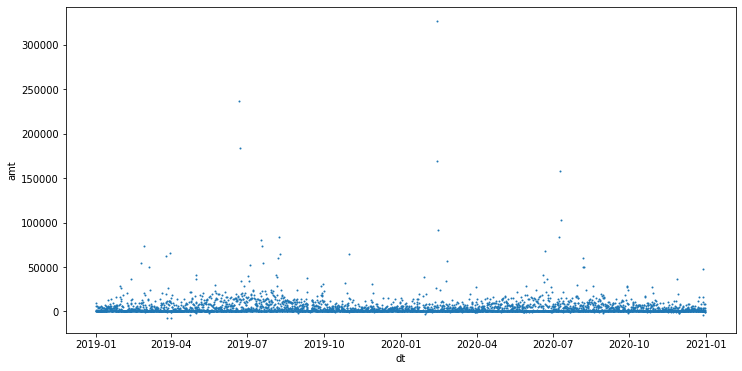

In [93]:
sales_in.plot.scatter('dt', 'amt', s=1, figsize=(12, 6))

In [110]:
print(f'length of sales in: {len(sales_in)}')

length of sales in: 4386


In [115]:
# Filter minus values
sales_in = sales_in[sales_in['sales'] >= 0]
sales_in = sales_in[sales_in['amt'] >= 0]
sales_in = sales_in[sales_in['dc'] >= 0]
sales_in = sales_in[sales_in['unit_price'] >= 0]

In [117]:
print(f'length of sales in: {len(sales_in)}')

length of sales in: 4291


##### Sales out

In [99]:
sales_out['dt'] = pd.to_datetime(sales_out['dt'], format='%Y%m%d')

In [102]:
sales_out['sales'] = sales_out['sales'].str.replace(',', '')
sales_out['amt'] = sales_out['amt'].str.replace(',', '')

In [103]:
sales_out['sales'] = sales_out['sales'].fillna(0)
sales_out['dc'] = sales_out['dc'].fillna(0)

In [104]:
sales_out['sales'] = sales_out['sales'].astype(int)
sales_out['amt'] = sales_out['amt'].astype(int)

<AxesSubplot:xlabel='dt', ylabel='sales'>

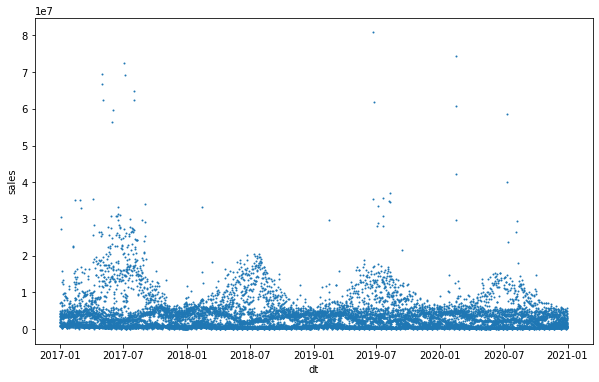

In [107]:
sales_out.plot.scatter('dt', 'sales', s=1, figsize=(10, 6))

In [116]:
# Filter minus values
sales_out = sales_out[sales_out['sales'] >= 0]
sales_out = sales_out[sales_out['amt'] >= 0]

In [137]:
from collections import defaultdict

In [143]:
test = defaultdict(dict)

In [144]:
ex = [1,2,3,4,5]
for num in ex:
    test['abc'].update({'ab': num})

In [145]:
test

defaultdict(dict, {'abc': {'ab': 5}})